In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/ĐAPM_AI/HandSign
!ls

/content/drive/MyDrive/Colab Notebooks/ĐAPM_AI/HandSign
asl_dataset  asl_dataset.rar  HandSignCNN.h5  HandSignVer2.ipynb


In [ ]:
#new path
path = "/content/drive/MyDrive/Colab Notebooks/ĐAPM_AI/HandSign/asl_dataset"

In [ ]:
import tensorflow as tf 
from tensorflow import keras
import cv2 
import os   
import random
import matplotlib.pyplot as plt 
import numpy as np 
from keras.models import Sequential
from sklearn import preprocessing
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imutils import paths
from tensorflow.keras import regularizers
from keras.layers import Conv2D,Dropout,Flatten,Dense
from sklearn.preprocessing import LabelBinarizer
from keras.layers import Input
from keras.layers.convolutional import MaxPooling2D

In [ ]:
#image_path
image_path = list(paths.list_images("/content/drive/MyDrive/Colab Notebooks/ĐAPM_AI/HandSign/asl_dataset/"))

#random
random.shuffle(image_path)
print(len(image_path))

2515


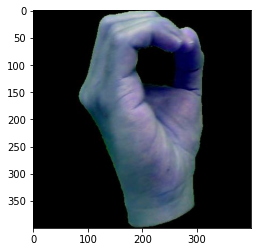

In [ ]:
a = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ĐAPM_AI/HandSign/asl_dataset/0/hand5_0_dif_seg_5_cropped.jpeg')
plt.imshow(a)

In [ ]:
#get labels
labels = [p.split(os.path.sep)[-2] for p in image_path]
print(labels)
#tranform labels to number
le = LabelEncoder()
labels = le.fit_transform(labels)

# One-hot encoding
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(len(labels))
print(labels[1])

['r', '3', 'o', '5', 'p', 'o', '6', '9', '5', '2', 'a', '5', 'g', 'q', '1', 'm', 'i', 'd', 'c', 'n', '1', 'l', 'p', 'f', 'v', '3', 'b', 'k', 's', 'u', '5', '7', 'h', 'f', 'm', 'x', 't', 'y', 'b', 'm', 'g', '4', 'g', '4', '9', 'j', 't', 'r', 'z', '5', '7', 'i', '6', 'o', 'x', '1', 'o', 'o', '7', 'k', 'h', '4', 'g', 'y', 'h', '1', 'i', 'd', '6', 'a', 'f', 't', '0', 'm', 'k', 'x', '3', '6', '5', '9', '0', '6', 'q', 't', 't', '4', '1', 'v', '1', '7', 'p', 'f', 'j', 'x', 's', 'v', 'a', '5', 'z', 'f', '1', 'r', 'w', '1', 'b', 'l', '5', '7', 'e', 'q', 'q', 'a', 'b', 'o', 'e', '5', 's', 'x', 'j', '6', 't', 'g', 'u', 'b', 'k', 'g', 'w', '4', 'v', 'j', 'l', 'y', 's', 'h', 'k', 'y', '9', 'w', 'b', 'f', 'b', 'a', 'v', '3', 'n', 'p', 'm', '4', 'b', 'y', 'v', '1', 'n', 'w', 'i', 'f', '2', 'i', 'p', 'y', '2', 'w', 'e', 'z', '7', 'h', 'd', '8', '3', 'q', 'u', '4', 'y', 'f', 'f', 'q', 'o', 'w', '7', '7', '2', '6', 'c', '2', 'q', 's', 'g', 'u', 'e', 'i', 'v', 'j', 'i', 'u', '4', 'v', 'm', 'u', 't', 'a',

In [ ]:
#get all images
list_image = []
for (j, imagePath) in enumerate(image_path):
    image = load_img(imagePath, target_size=(64,64))
    image = img_to_array(image)
    image = np.expand_dims(image, 0)
    image = imagenet_utils.preprocess_input(image)
    list_image.append(image)
list_image = np.vstack(list_image)
print(len(list_image))


2515


In [ ]:
print(list_image.shape)

(2515, 64, 64, 3)


In [ ]:
print(list_image[1])

[[[-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  ...
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]]

 [[-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  ...
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]]

 [[-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  ...
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]]

 ...

 [[-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  ...
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]]

 [[-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  ...
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]
  [-103.939 -116.779 -123.68 ]]

 [[-103.939 -116.779 -12

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

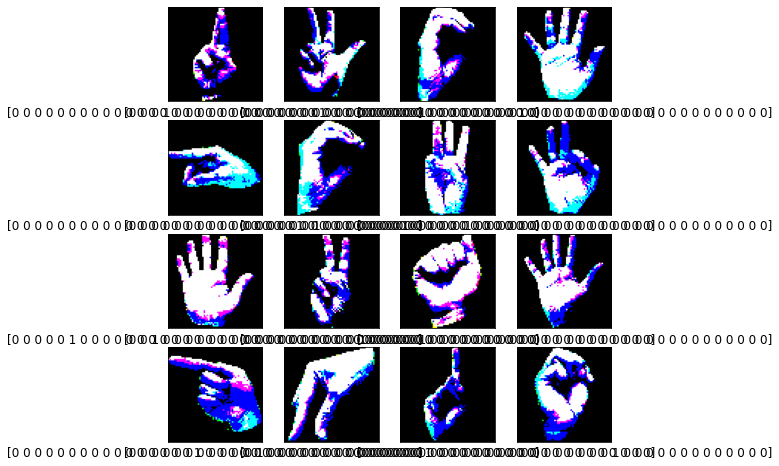

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([]), plt.yticks([]), plt.grid(False)
    plt.imshow(list_image[i], cmap='gray')
    plt.xlabel(f'{labels[i]}', fontsize = 12)
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(list_image, labels, test_size=0.2, random_state=42)

In [ ]:
print(len(X_train))
print(len(X_test))

2012
503


In [ ]:
#agument data
aug_train = ImageDataGenerator(rescale=1./255, rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, 
                         zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

aug_test= ImageDataGenerator(rescale=1./255)

In [ ]:
model = Sequential()
#extract features
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
#model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
# model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(36, activation='softmax'))



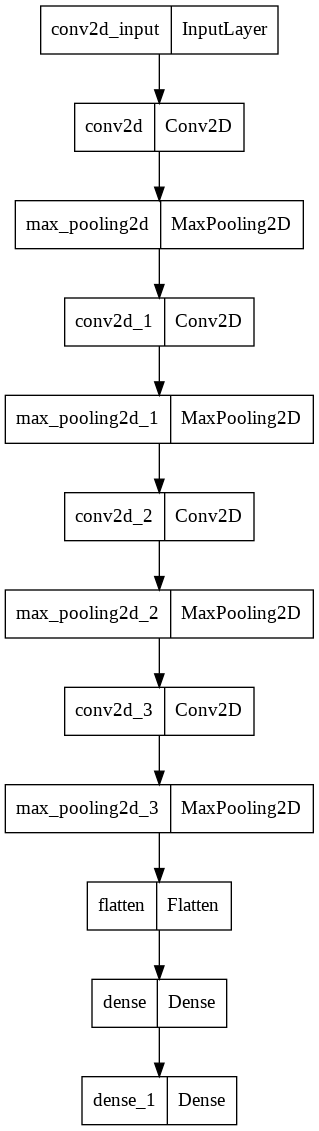

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=False
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 256)      0

In [ ]:
model.compile(loss ="categorical_crossentropy", optimizer ="adam", metrics = ["accuracy"])

In [ ]:
H = model.fit(aug_train.flow(X_train, y_train, batch_size=64), 
                        steps_per_epoch=len(X_train)//64,
                        validation_data=(aug_test.flow(X_test, y_test, batch_size=64)),
                        validation_steps=len(X_test)//64,
                        epochs=40)

Epoch 1/40
31/31 [==============================] - 41s 1s/step - loss: 3.8824 - accuracy: 0.0601 - val_loss: 2.8822 - val_accuracy: 0.1652
Epoch 2/40
31/31 [==============================] - 30s 955ms/step - loss: 2.8973 - accuracy: 0.1407 - val_loss: 2.2186 - val_accuracy: 0.2634
Epoch 3/40
31/31 [==============================] - 31s 985ms/step - loss: 2.5183 - accuracy: 0.2182 - val_loss: 1.5984 - val_accuracy: 0.4442
Epoch 4/40
31/31 [==============================] - 31s 976ms/step - loss: 2.1253 - accuracy: 0.3214 - val_loss: 1.4404 - val_accuracy: 0.4978
Epoch 5/40
31/31 [==============================] - 31s 977ms/step - loss: 1.7675 - accuracy: 0.4112 - val_loss: 1.1287 - val_accuracy: 0.5982
Epoch 6/40
31/31 [==============================] - 31s 998ms/step - loss: 1.5661 - accuracy: 0.4738 - val_loss: 0.9015 - val_accuracy: 0.6652
Epoch 7/40
31/31 [==============================] - 30s 955ms/step - loss: 1.3011 - accuracy: 0.5452 - val_loss: 0.9042 - val_accuracy: 0.6629
Ep

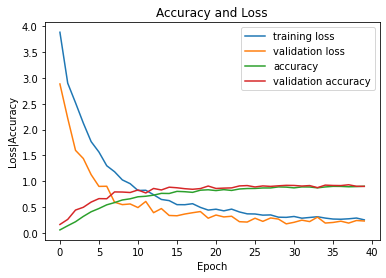

In [ ]:
fig = plt.figure()
numOfEpoch = 40
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/ĐAPM_AI/HandSign/HandSignCNN_0.2Ver3.h5')

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

+ precision = 0.877
+ recall = 0.865
+ f1_score = 0.846


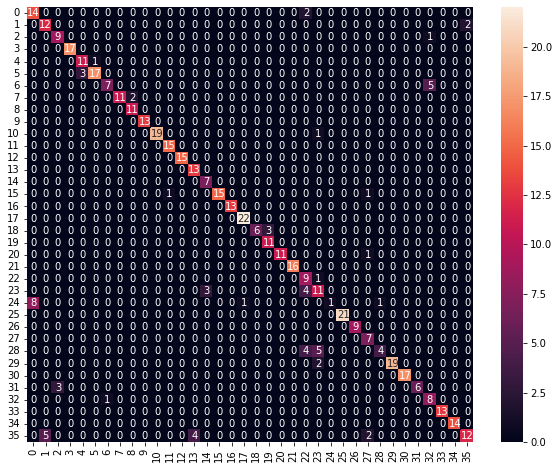

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred ,axis = 1)
y_true=np.argmax(y_test,axis = 1)
a = precision_recall_fscore_support(y_true, y_pred, average='macro')
cf = confusion_matrix(y_true,y_pred)

print(f'+ precision = {a[0]:.3f}')
print(f'+ recall = {a[1]:.3f}')
print(f'+ f1_score = {a[2]:.3f}')
plt.figure(figsize = (10,8))
ax = sns.heatmap(data=cf ,fmt="d",annot = True)
plt.show()